# Exploratory Notebook

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../Data/im.db')

In [3]:
pd.read_sql("""

SELECT *
FROM movie_basics







""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
pd.read_sql("""

SELECT *
FROM movie_ratings







""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
pd.read_sql("""

SELECT *
FROM movie_akas







""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [6]:
pd.read_sql("""

SELECT primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
GROUP BY numvotes
ORDER BY averagerating DESC
LIMIT 25




""", conn)

,primary_title,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,9.7,5600
1,Ekvtime: Man of God,9.6,2604
2,Aloko Udapadi,9.5,6509
3,Peranbu,9.4,9629
4,The Mountain II,9.3,100568
5,Aynabaji,9.3,18470
6,Wheels,9.3,17308
7,Adutha Chodyam,9.3,587
8,The Last Pogo Jumps Again,9.3,42
9,CM101MMXI Fundamentals,9.2,41560


In [7]:
pd.read_sql("""

SELECT DISTINCT genres, primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
GROUP BY genres
ORDER BY numvotes DESC

""", conn)

,genres,primary_title,averagerating,numvotes
0,"Adventure,Drama,Sci-Fi",Interstellar,8.6,1299334
1,"Action,Adventure,Sci-Fi",Jurassic World,7.0,539338
2,"Adventure,Mystery,Sci-Fi",Prometheus,7.0,538720
3,"Adventure,Drama,Fantasy",Life of Pi,7.9,535836
4,"Mystery,Sci-Fi,Thriller",Limitless,7.4,492490
...,...,...,...,...
919,"Action,Romance,Sci-Fi",Archangel Alpha,6.8,5
920,"Action,Drama",To Chase a Million,7.4,5
921,"Action,Documentary,Horror",The Toxic Retards,6.4,5
922,"Action,Crime,Musical",1 911 Jak Boyz,4.4,5


In [8]:
df = pd.read_sql("""

SELECT DISTINCT genres, primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
GROUP BY genres
ORDER BY numvotes DESC

""", conn)

In [9]:
df

,genres,primary_title,averagerating,numvotes
0,"Adventure,Drama,Sci-Fi",Interstellar,8.6,1299334
1,"Action,Adventure,Sci-Fi",Jurassic World,7.0,539338
2,"Adventure,Mystery,Sci-Fi",Prometheus,7.0,538720
3,"Adventure,Drama,Fantasy",Life of Pi,7.9,535836
4,"Mystery,Sci-Fi,Thriller",Limitless,7.4,492490
...,...,...,...,...
919,"Action,Romance,Sci-Fi",Archangel Alpha,6.8,5
920,"Action,Drama",To Chase a Million,7.4,5
921,"Action,Documentary,Horror",The Toxic Retards,6.4,5
922,"Action,Crime,Musical",1 911 Jak Boyz,4.4,5


In [10]:
df['genres'] = df['genres'].str.split(',') 

In [11]:
df = df[df['genres'].notnull()]

In [12]:
df = df.explode('genres')

In [13]:
df = df.drop_duplicates(subset=['primary_title'])

In [14]:
df.to_sql('cleaned_movies', conn, if_exists='replace')

In [34]:
df.shape

(923, 5)

In [15]:
df.head(10)

,genres,primary_title,averagerating,numvotes
0,Adventure,Interstellar,8.6,1299334
1,Action,Jurassic World,7.0,539338
2,Adventure,Prometheus,7.0,538720
3,Adventure,Life of Pi,7.9,535836
4,Mystery,Limitless,7.4,492490
5,Action,Wonder Woman,7.5,487527
6,Action,Source Code,7.5,452036
7,Adventure,Harry Potter and the Deathly Hallows: Part 1,7.7,425530
8,Action,Scott Pilgrim vs. the World,7.5,339338
9,Action,The Equalizer,7.2,302302


In [16]:
df.tail(10)

,genres,primary_title,averagerating,numvotes
914,Comedy,Drugged Out Sexed Up,5.6,5
915,Biography,Punk Strut: The Movie,8.2,5
916,Biography,The Gertrude Stein Mystery or Some Like It Art,5.2,5
917,Animation,We Have to Do Something,7.6,5
918,Adventure,Chasing Che,5.2,5
919,Action,Archangel Alpha,6.8,5
920,Action,To Chase a Million,7.4,5
921,Action,The Toxic Retards,6.4,5
922,Action,1 911 Jak Boyz,4.4,5
923,Action,Little Tigers,2.8,5


<ipython-input-17-649e9e22a257>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_counts.index, rotation=45, ha='right')


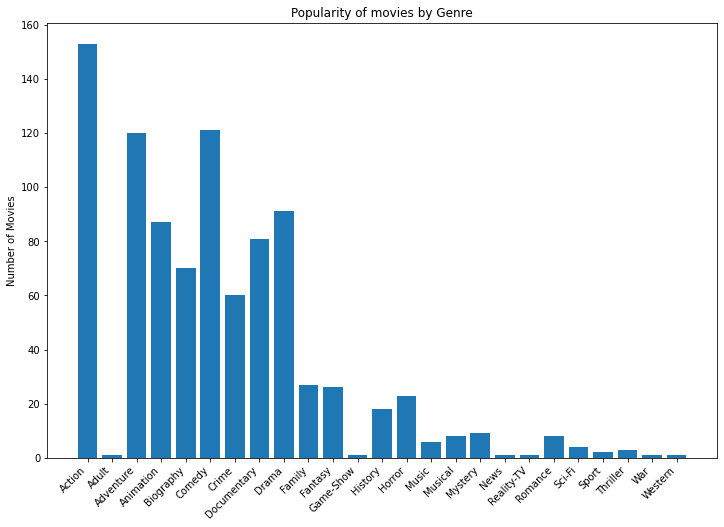

In [17]:
df = pd.read_sql("""SELECT * FROM cleaned_movies""", conn)

# Count genres
genre_counts = df.groupby('genres')['primary_title'].count()

# bar chart 
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(genre_counts.index, genre_counts.values)
ax.set_ylabel('Number of Movies')
ax.set_title('Popularity of movies by Genre')
ax.set_xticklabels(genre_counts.index, rotation=45, ha='right')

# show plot
plt.show()